Since we don't have train and test folders, we will have to manually split the dataset into training and validation sets. I split it into 80% training and 20% validation.

Also, the images in the dog-breeds dataset are not of size 28x28, so I will have to adjust the input_shape variable accordingly. The images in this dataset are of different sizes, so I will have to resize them to a fixed size before training. I chose 64x64 as my fixed size.

Lastly, I will have to modify the code to work with color images since the images in the dog-breeds dataset are RGB images (i.e., 64x64x3).



Number of classes: 9
Class names: ['bulldog', 'german-shepherd', 'rottweiler', 'beagle', 'dog-breeds', 'dalmatian', 'husky', 'poodle', 'labrador-retriever']
Processing class bulldog ...
Processing class german-shepherd ...
Processing class rottweiler ...
Processing class beagle ...
Processing class dog-breeds ...
Invalid image file: dog-breeds/dog-breeds/poodle in class dog-breeds
Invalid image file: dog-breeds/dog-breeds/rottweiler in class dog-breeds
Invalid image file: dog-breeds/dog-breeds/dalmatian in class dog-breeds
Invalid image file: dog-breeds/dog-breeds/labrador-retriever in class dog-breeds
Invalid image file: dog-breeds/dog-breeds/bulldog in class dog-breeds
Invalid image file: dog-breeds/dog-breeds/husky in class dog-breeds
Invalid image file: dog-breeds/dog-breeds/beagle in class dog-breeds
Invalid image file: dog-breeds/dog-breeds/german-shepherd in class dog-breeds
Processing class dalmatian ...
Processing class husky ...
Processing class poodle ...
Processing class la

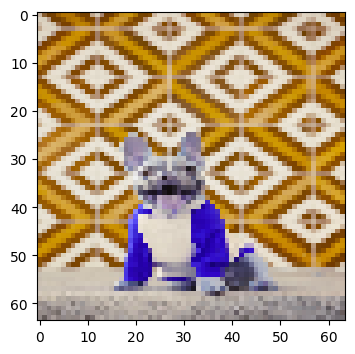

In [40]:
# Basic imports

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.losses import mse, binary_crossentropy
from keras.utils.vis_utils import plot_model
from keras import backend as K

from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from keras.layers import Reshape, Flatten, BatchNormalization, Activation

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os
import cv2

def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.

        args (tensor): mean and log of variance of Q(z|X)

        z (tensor): sampled latent vector
    """
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Load the dog-breeds dataset
data_dir = "dog-breeds"
class_names = os.listdir(data_dir)
num_classes = len(class_names)
print("Number of classes:", num_classes)
print("Class names:", class_names)

x_train = []
x_val = []

for i, class_name in enumerate(class_names):
    print("Processing class", class_name, "...")
    class_dir = os.path.join(data_dir, class_name)
    filenames = os.listdir(class_dir)
    np.random.shuffle(filenames)
    split_idx = int(0.8 * len(filenames))
    train_filenames = filenames[:split_idx]
    val_filenames = filenames[split_idx:]

    for filename in train_filenames:
        img = cv2.imread(os.path.join(class_dir, filename))
        if img is None:
            print(f"Invalid image file: {os.path.join(class_dir, filename)} in class {class_name}")
            continue
        img = cv2.resize(img, (64, 64))
        x_train.append(img)


    for filename in val_filenames:
        img = cv2.imread(os.path.join(class_dir, filename))
        if img is None:
            print(f"Invalid image file: {os.path.join(class_dir, filename)} in class {class_name}")
            continue
        img = cv2.resize(img, (64, 64))
        x_val.append(img)


x_train = np.array(x_train)
x_val = np.array(x_val)

input_shape = x_train.shape[1:]

print("We loaded the dog-breeds dataset:")
print("input_shape:", input_shape)
print("x_train:", x_train.shape)
print("x_val:", x_val.shape)

x1 = x_val[0] #looks at the first validation sample
print(x1.shape, "stats:", np.max(x1), np.min(x1), np.mean(x1))

plt.figure(figsize=(4,4))
plt.imshow(x1, cmap='gray', vmin=0, vmax=255) # displays the first validation sample in gray scale
plt.show() # displays the plot
